In [30]:
import more_itertools

def isSubsetSum(set, n, target_sum):
    subset = [[False for _ in range(target_sum + 1)] for _ in range(n + 1)]

    for i in range(n + 1):
        subset[i][0] = True

    for i in range(1, target_sum + 1):
        subset[0][i] = False

    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            if j < set[i - 1]:
                subset[i][j] = subset[i - 1][j]
            if j >= set[i - 1]:
                subset[i][j] = subset[i - 1][j] or subset[i - 1][j - set[i - 1]]

    return subset[n][target_sum]

def issubsetsum(set, n, sum):
    # Base Cases
    if (sum == 0):
        return True
    if (n == 0):
        return False

    # If last element is greater than
    # sum, then ignore it
    if (set[n - 1] > sum):
        return issubsetsum(set, n - 1, sum)

    # Else, check if sum can be obtained
    # by any of the following
    # (a) including the last element
    # (b) excluding the last element
    return issubsetsum(set, n - 1, sum) or issubsetsum(set, n - 1, sum - set[n - 1])

set = [3, 34, 4, 12, 5, 2]
target_sum = 9
n = len(set)
if isSubsetSum(set, n, target_sum):
    print("Found a subset with given sum:" ,target_sum)
    result = [subset for subset in more_itertools.powerset(set) if sum(subset) == target_sum]
    print(result)
else:
    print("No subset with given sum")

if issubsetsum(set, n, target_sum):
    print("(Recursivo) Found a subset with the given sum:", target_sum)
    result = [subset for subset in more_itertools.powerset(set) if sum(subset) == target_sum]
    print(result)
else:
    print("issubsetsum: No subset with the given sum")


Found a subset with given sum: 9
[(4, 5), (3, 4, 2)]
(Recursivo) Found a subset with the given sum: 9
[(4, 5), (3, 4, 2)]


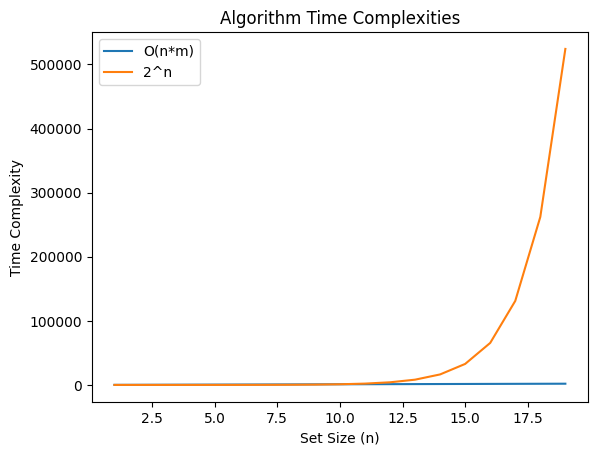

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

set_sizes = list(range(1, 20))
target_sum = 100  

plt.plot(set_sizes, [n * target_sum for n in set_sizes], label="O(n*m)")
plt.plot(set_sizes, [2**n for n in set_sizes], label="2^n")

plt.xlabel("Set Size (n)")
plt.ylabel("Time Complexity")
plt.legend()
plt.title("Algorithm Time Complexities")
plt.show()

plt.savefig("complexity_plot.png", dpi=300)
